# Supervised Modelling

---
### <i>Changelogs:</i>

  Name  |  Date  |   Description
- **Kiet Vu**   |  03/23  | File Created.
- **Kiet Vu**  |  04/21  | Testing and modeling by Decision Trees Regression
- **Kiet Vu**  |  04/23  | Remodelling Decision Trees Regression since many columns are unimportant/ continous data
- **Nicole Nguyen**  |  04/23  | Testing and adding Naive Bayes
- **Kiet Vu**  |  04/27  | Setting Independent and Dependent variable to standardize the modellings
- **Bao Tran**  |  04/27  | Adding Knn
---

- **[Setting Independent and Dependent Variables for Training](#Variables)**
<br>
- **[Multi-Linear Regression](#MultiLinearRegression)**:
This is a popular statistical method used for binary classification problems. You can use logistic regression to predict the target variable based on the categorical attributes.
        Columns chosen:
<br>

- **[Decision Trees](#DecisionTrees)**:
Decision trees are a popular algorithm for classification problems, especially when the data has categorical attributes. Decision trees can be used to split the data based on the categories of the attributes, and make a prediction based on the majority class at each leaf node.
        
        Columns chosen:
'unique_identifier','usage','status',
"B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"

<br>

- **[Random Forests](#RandomForests)**: 
Random forests are an ensemble method that combines multiple decision trees to improve the accuracy of the predictions. Random forests are especially useful for high-dimensional datasets with a large number of categorical attributes.
        Columns chosen:
<br>

- **[Naive Bayes](#NaiveBayers)**: 
Naive Bayes is a simple probabilistic algorithm used for classification tasks. It assumes that the attributes are conditionally independent given the target variable, and uses Bayes' theorem to calculate the probability of each class given the attributes.
        Columns chosen:
<br>

- **[K-Nearest Neighbor (K-NN)](KNN)**: 
K-NN is a non-parametric algorithm that can be used for classification tasks. It works by finding the K nearest neighbors of a new data point based on the categorical attributes, and assigning a class label based on the majority class of the neighbors.
        Columns chosen:
        
---

## Import libraries and raw data

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("Clean Data/ready_dataset_20230420.csv", low_memory=False)
df = data.copy()
df.head(30)

,unique_identifier,B2B_ADDR_ZIP5,B2B_ADDR_STATE,B2B_ACCEPT_CREDIT_CARD_FLAG,B2B_ACCOUNTING_EXPENSE_CODE,B2B_AD_SIZE,B2B_ADVERTISING_EXPENSE_CODE,B2B_ASSET_FLAG,B2B_BANKRUPTCY_DATE,B2B_BANKRUPTCY_FLAG,...,B2B_TRANSACTION_TYPE,B2B_TRUE_FRNCHSE_FLAG,B2B_UTILITY_CODE,B2B_WEALTH_FLAG,B2B_WHITE_COLLAR_FLAG,B2B_WHITE_COLLAR_PRCNT,B2B_YEAR_SIC_ADD,CAC_SEGMENT,usage,status
0,0001230a214b39e0e5c463bfe440fb15,44240,OH,NaN,C,A,A,NaN,NaN,NaN,...,NaN,2.0,D,NaN,NaN,25.0,201801.0,Manufacturing,81440.0,FINALLED
1,000345e997e72b61b990d2689c76427f,15218,PA,NaN,D,A,C,NaN,NaN,NaN,...,NaN,NaN,B,NaN,1.0,99.0,198405.0,Business and Finance,556.3,ACTIVE
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,44067,OH,ADMV,C,B,B,NaN,NaN,NaN,...,NaN,2.0,A,1.0,NaN,16.0,201909.0,Personal Services,32564.0,FINALLED
3,00082675e86a9f3cf5fdcc5d4cd9114d,60618,IL,NaN,D,NaN,B,NaN,NaN,NaN,...,NaN,2.0,C,NaN,NaN,21.0,199104.0,Blue Collar Work,5519.0,FINALLED
4,00095201031df44962513f378842d521,61111,IL,DMV,A,A,A,NaN,NaN,NaN,...,NaN,2.0,A,NaN,1.0,83.0,201303.0,General Merchandise,5946.0,ACTIVE
5,000a04481ee5acbb856a7c485a67423a,62526,IL,NaN,E,A,D,NaN,NaN,NaN,...,NaN,2.0,D,NaN,1.0,50.0,201902.0,Personal Services,75468.0,FINALLED
6,000bee0b537b676a975a15999776581f,2110,MA,NaN,C,B,C,NaN,NaN,NaN,...,NaN,1.0,A,NaN,NaN,10.0,202011.0,Food and Dining,88280.0,FINALLED
7,000c88d34beda722f7b559bb056b7809,78064,TX,ADMV,A,A,A,NaN,NaN,NaN,...,NaN,2.0,A,NaN,NaN,29.0,201303.0,Hotels and Educational Boarding,109258.0,ACTIVE
8,000f645a52095f72ec723133e2b0092c,45601,OH,NaN,D,NaN,A,NaN,NaN,NaN,...,NaN,2.0,B,NaN,1.0,97.0,202007.0,"Public, Health, and Social Services",9686.0,FINALLED
9,00109796f3c34d87f1ff2778498a8016,18330,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,0.0,201909.0,Unknown,65700.0,FINALLED


---
## Setting Independent and Dependent Variables for Training <a class="anchor" id="Variables"></a>
### I did this so you don't have to!

If you want to modify you training data, just do:

    for dropping
`X_[your model name here] = df.drop(['column name',...], axis=1)`

    for adding
`X_[your model name here] = df[['column name','column name',...]]`

<br>

**Note:** "X" varible is the unversal name to run all models, modify the train data in your own part and set it as `X_[your model name` if you want to change the independent variables for training the data

- **Column to take:**
`"unique_identifier",
"B2B_ADDR_STATE",
"B2B_ACCOUNTING_EXPENSE_CODE",
"B2B_ADVERTISING_EXPENSE_CODE",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_CONTRACT_LABOR_EXPENSE_CODE",
"B2B_CREDIT_GRADE",
"B2B_EMPLOYEE_SIZE",
"B2B_EXPENSE_TYPE",
"B2B_HIGH_TECH_FLAG",
"B2B_INSURANCE_EXPENSE_CODE",
"B2B_LEGAL_EXPENSE_CODE",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_MULTI_TENANT_DESCRIP",
"B2B_PAYROLL_EXPENSE_CODE",
"B2B_PURCHASE_ADMIN_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"B2B_REST_LEASE_EXPENSE_CODE",
"B2B_SALES_VOLUME",
"B2B_SMALL_SIZE_FLAG",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_TENANT_FLAG",
"B2B_UTILITY_CODE",
"B2B_WHITE_COLLAR_FLAG",
"CAC_SEGMENT",
"usage",
"status"`
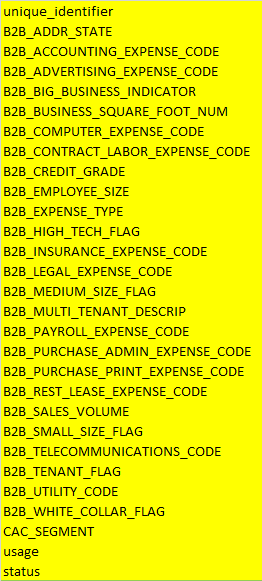

- **Column to drop:**
`"B2B_ADDR_ZIP5",
"B2B_ACCEPT_CREDIT_CARD_FLAG",
"B2B_AD_SIZE",
"B2B_BUSINESS_DESCRIP_FLAG",
"B2B_BUSINESS_GROW_FLAG",
"B2B_CALL_STATUS",
"B2B_CREDIT_FLAG",
"B2B_CREDIT_SCORE",
"B2B_CREDIT_YEAR",
"B2B_EMPLOYEE_DERVTN_FLAG",
"B2B_EMPLOYEE_NUM",
"B2B_FIRST_YEAR_CCYY",
"B2B_HIGH_INCOME_EXEC_FLAG",
"B2B_MULTI_EXEC_FLAG",
"B2B_NAICS_CODE",
"B2B_NAICS_CODE_DESCRIP",
"B2B_NAICS1",
"B2B_NAICS1_DESCRIP",
"B2B_NAICS2",
"B2B_NAICS2_DESCRIP",
"B2B_OFFICE_SUPPLY_EXPENSE_CODE",
"B2B_PACKAGE_EXPENSE_CODE",
"B2B_PAY_AT_PUMP_FLAG",
"B2B_POP_DENSITY",
"B2B_PRIMARY_SIC",
"B2B_PRIMARY_SIC_DESCRIP",
"B2B_PRIMARY_SIC_FLAG",
"B2B_PRIMARY_SITE_FLAG",
"B2B_SALES_VOLUME_ESTIM",
"B2B_SECONDARY_SIC_CODE1",
"B2B_SECONDARY_SIC_CODE2",
"B2B_SECONDARY_SIC_DESCRIP1",
"B2B_SECONDARY_SIC_DESCRIP2",
"B2B_SIC_CODE",
"B2B_SIC_DESCRIP",
"B2B_STATE_CODE",
"B2B_TRUE_FRNCHSE_FLAG",
"B2B_WEALTH_FLAG",
"B2B_WHITE_COLLAR_PRCNT",
"B2B_YEAR_SIC_ADD"`
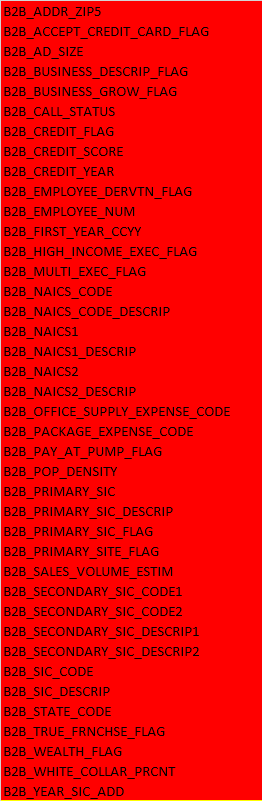

- **Column that in cosinderation:**
`"B2B_INDIVIDUAL_FLAG",
"B2B_NUM_TENANATS",
"B2B_PRODUCTION_DATE",`
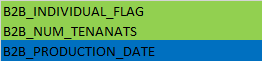

In [3]:
independents = df[["unique_identifier", "B2B_ADDR_STATE", "B2B_ACCOUNTING_EXPENSE_CODE", 
                        "B2B_ADVERTISING_EXPENSE_CODE", "B2B_BIG_BUSINESS_INDICATOR", 
                        "B2B_BUSINESS_SQUARE_FOOT_NUM", "B2B_COMPUTER_EXPENSE_CODE", 
                        "B2B_CONTRACT_LABOR_EXPENSE_CODE", "B2B_CREDIT_GRADE", "B2B_EMPLOYEE_SIZE", 
                        "B2B_EXPENSE_TYPE", "B2B_HIGH_TECH_FLAG", "B2B_INSURANCE_EXPENSE_CODE", "B2B_LEGAL_EXPENSE_CODE"
                        , "B2B_MEDIUM_SIZE_FLAG", "B2B_MULTI_TENANT_DESCRIP", "B2B_PAYROLL_EXPENSE_CODE",
                        "B2B_PURCHASE_ADMIN_EXPENSE_CODE", "B2B_PURCHASE_PRINT_EXPENSE_CODE", 
                        "B2B_REST_LEASE_EXPENSE_CODE", "B2B_SALES_VOLUME", "B2B_SMALL_SIZE_FLAG", 
                        "B2B_TELECOMMUNICATIONS_CODE", "B2B_TENANT_FLAG", "B2B_UTILITY_CODE", "B2B_WHITE_COLLAR_FLAG", 
                        "CAC_SEGMENT", "usage", "status"]]
pd.set_option('display.max_columns', None)
independents

,unique_identifier,B2B_ADDR_STATE,B2B_ACCOUNTING_EXPENSE_CODE,B2B_ADVERTISING_EXPENSE_CODE,B2B_BIG_BUSINESS_INDICATOR,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_COMPUTER_EXPENSE_CODE,B2B_CONTRACT_LABOR_EXPENSE_CODE,B2B_CREDIT_GRADE,B2B_EMPLOYEE_SIZE,B2B_EXPENSE_TYPE,B2B_HIGH_TECH_FLAG,B2B_INSURANCE_EXPENSE_CODE,B2B_LEGAL_EXPENSE_CODE,B2B_MEDIUM_SIZE_FLAG,B2B_MULTI_TENANT_DESCRIP,B2B_PAYROLL_EXPENSE_CODE,B2B_PURCHASE_ADMIN_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,B2B_REST_LEASE_EXPENSE_CODE,B2B_SALES_VOLUME,B2B_SMALL_SIZE_FLAG,B2B_TELECOMMUNICATIONS_CODE,B2B_TENANT_FLAG,B2B_UTILITY_CODE,B2B_WHITE_COLLAR_FLAG,CAC_SEGMENT,usage,status
0,0001230a214b39e0e5c463bfe440fb15,OH,C,A,N,6,E,C,A,C,L,N,NaN,C,Y,NaN,D,C,NaN,D,C,N,B,NaN,D,NaN,Manufacturing,81440.0,FINALLED
1,000345e997e72b61b990d2689c76427f,PA,D,C,N,A,F,NaN,B,B,L,N,B,E,N,2 - 4,C,D,D,C,C,Y,D,A,B,1.0,Business and Finance,556.3,ACTIVE
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,OH,C,B,N,3,D,B,C+,C,L,N,C,C,Y,2 - 4,B,D,B,A,B,N,B,A,A,NaN,Personal Services,32564.0,FINALLED
3,00082675e86a9f3cf5fdcc5d4cd9114d,IL,D,B,N,2,D,B,B+,B,L,N,NaN,C,N,NaN,D,B,NaN,C,C,Y,C,NaN,C,NaN,Blue Collar Work,5519.0,FINALLED
4,00095201031df44962513f378842d521,IL,A,A,N,3,A,A,U,A,L,N,A,A,N,5 - 9,A,A,A,A,A,N,A,B,A,1.0,General Merchandise,5946.0,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,fff7c0d1b2f896b1018ef67a9d286361,MA,B,A,N,2,C,B,C,A,L,N,B,A,N,NaN,A,C,A,A,A,Y,A,NaN,A,1.0,Business and Finance,11980.0,FINALLED
49435,fffce8918ebaae88423f62806f22c414,MA,C,A,N,2,D,C,B+,A,L,N,B,B,N,2 - 4,B,D,D,B,A,Y,B,A,A,1.0,Business and Finance,11080.0,ACTIVE
49436,fffd155082881fa090b08ca6ceed7005,TX,B,A,N,2,C,B,B+,B,L,N,B,B,N,2 - 4,A,C,A,B,A,Y,A,A,B,NaN,Auto,93876.0,ACTIVE
49437,fffe3fcb6ca0166ec15af3958ac145e8,MA,C,B,N,3,E,B,B,B,L,N,B,D,N,NaN,C,D,G,A,B,Y,B,NaN,A,NaN,Personal Services,9072.0,ACTIVE


From 103, we have 29 columns left (the cleaning leave us with..?)

In [4]:
independents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49439 entries, 0 to 49438
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unique_identifier                49439 non-null  object 
 1   B2B_ADDR_STATE                   49439 non-null  object 
 2   B2B_ACCOUNTING_EXPENSE_CODE      40205 non-null  object 
 3   B2B_ADVERTISING_EXPENSE_CODE     41852 non-null  object 
 4   B2B_BIG_BUSINESS_INDICATOR       49439 non-null  object 
 5   B2B_BUSINESS_SQUARE_FOOT_NUM     49439 non-null  object 
 6   B2B_COMPUTER_EXPENSE_CODE        41681 non-null  object 
 7   B2B_CONTRACT_LABOR_EXPENSE_CODE  40830 non-null  object 
 8   B2B_CREDIT_GRADE                 49427 non-null  object 
 9   B2B_EMPLOYEE_SIZE                49439 non-null  object 
 10  B2B_EXPENSE_TYPE                 49439 non-null  object 
 11  B2B_HIGH_TECH_FLAG               49439 non-null  object 
 12  B2B_INSURANCE_EXPE

In [5]:
#label encoding data

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

independents.iloc[:, 2:-2] = independents.iloc[:, 2:-2].apply(le.fit_transform)
independents

C:\Users\PREDATOR\anaconda3\lib\site-packages\pandas\core\indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,unique_identifier,B2B_ADDR_STATE,B2B_ACCOUNTING_EXPENSE_CODE,B2B_ADVERTISING_EXPENSE_CODE,B2B_BIG_BUSINESS_INDICATOR,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_COMPUTER_EXPENSE_CODE,B2B_CONTRACT_LABOR_EXPENSE_CODE,B2B_CREDIT_GRADE,B2B_EMPLOYEE_SIZE,B2B_EXPENSE_TYPE,B2B_HIGH_TECH_FLAG,B2B_INSURANCE_EXPENSE_CODE,B2B_LEGAL_EXPENSE_CODE,B2B_MEDIUM_SIZE_FLAG,B2B_MULTI_TENANT_DESCRIP,B2B_PAYROLL_EXPENSE_CODE,B2B_PURCHASE_ADMIN_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,B2B_REST_LEASE_EXPENSE_CODE,B2B_SALES_VOLUME,B2B_SMALL_SIZE_FLAG,B2B_TELECOMMUNICATIONS_CODE,B2B_TENANT_FLAG,B2B_UTILITY_CODE,B2B_WHITE_COLLAR_FLAG,CAC_SEGMENT,usage,status
0,0001230a214b39e0e5c463bfe440fb15,OH,2,0,0,5,4,2,0,2,1,0,7,2,1,3,3,2,7,3,2,0,1,3,3,1,7,81440.0,FINALLED
1,000345e997e72b61b990d2689c76427f,PA,3,2,0,8,5,7,2,1,1,0,1,4,0,1,2,3,3,2,2,1,3,0,1,0,3,556.3,ACTIVE
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,OH,2,1,0,2,3,1,5,2,1,0,2,2,1,1,1,3,1,0,1,0,1,0,0,1,8,32564.0,FINALLED
3,00082675e86a9f3cf5fdcc5d4cd9114d,IL,3,1,0,1,3,1,3,1,1,0,7,2,0,3,3,1,7,2,2,1,2,3,2,1,2,5519.0,FINALLED
4,00095201031df44962513f378842d521,IL,0,0,0,2,0,0,8,0,1,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,5,5946.0,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,fff7c0d1b2f896b1018ef67a9d286361,MA,1,0,0,1,2,1,4,0,1,0,1,0,0,3,0,2,0,0,0,1,0,3,0,0,3,11980.0,FINALLED
49435,fffce8918ebaae88423f62806f22c414,MA,2,0,0,1,3,2,3,0,1,0,1,1,0,1,1,3,3,1,0,1,1,0,0,0,3,11080.0,ACTIVE
49436,fffd155082881fa090b08ca6ceed7005,TX,1,0,0,1,2,1,3,1,1,0,1,1,0,1,0,2,0,1,0,1,0,0,1,1,1,93876.0,ACTIVE
49437,fffe3fcb6ca0166ec15af3958ac145e8,MA,2,1,0,2,4,1,2,1,1,0,1,3,0,3,2,3,6,0,1,1,1,3,0,1,8,9072.0,ACTIVE


In [6]:
independents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49439 entries, 0 to 49438
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unique_identifier                49439 non-null  object 
 1   B2B_ADDR_STATE                   49439 non-null  object 
 2   B2B_ACCOUNTING_EXPENSE_CODE      49439 non-null  int32  
 3   B2B_ADVERTISING_EXPENSE_CODE     49439 non-null  int32  
 4   B2B_BIG_BUSINESS_INDICATOR       49439 non-null  int32  
 5   B2B_BUSINESS_SQUARE_FOOT_NUM     49439 non-null  int32  
 6   B2B_COMPUTER_EXPENSE_CODE        49439 non-null  int32  
 7   B2B_CONTRACT_LABOR_EXPENSE_CODE  49439 non-null  int32  
 8   B2B_CREDIT_GRADE                 49439 non-null  int32  
 9   B2B_EMPLOYEE_SIZE                49439 non-null  int32  
 10  B2B_EXPENSE_TYPE                 49439 non-null  int32  
 11  B2B_HIGH_TECH_FLAG               49439 non-null  int32  
 12  B2B_INSURANCE_EXPE

In [7]:
# Setting independent and target variables
X = independents.iloc[:,2:-2]
y = df["usage"]

**Since the target variable are `float`, we would set other categorical values to float as well**

In [8]:
for i in X:
    X[i] = X[i].astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49439 entries, 0 to 49438
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   B2B_ACCOUNTING_EXPENSE_CODE      49439 non-null  float64
 1   B2B_ADVERTISING_EXPENSE_CODE     49439 non-null  float64
 2   B2B_BIG_BUSINESS_INDICATOR       49439 non-null  float64
 3   B2B_BUSINESS_SQUARE_FOOT_NUM     49439 non-null  float64
 4   B2B_COMPUTER_EXPENSE_CODE        49439 non-null  float64
 5   B2B_CONTRACT_LABOR_EXPENSE_CODE  49439 non-null  float64
 6   B2B_CREDIT_GRADE                 49439 non-null  float64
 7   B2B_EMPLOYEE_SIZE                49439 non-null  float64
 8   B2B_EXPENSE_TYPE                 49439 non-null  float64
 9   B2B_HIGH_TECH_FLAG               49439 non-null  float64
 10  B2B_INSURANCE_EXPENSE_CODE       49439 non-null  float64
 11  B2B_LEGAL_EXPENSE_CODE           49439 non-null  float64
 12  B2B_MEDIUM_SIZE_FL

In [9]:
y

0        81440.0
1          556.3
2        32564.0
3         5519.0
4         5946.0
          ...   
49434    11980.0
49435    11080.0
49436    93876.0
49437     9072.0
49438    20892.0
Name: usage, Length: 49439, dtype: float64

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49439 entries, 0 to 49438
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   B2B_ACCOUNTING_EXPENSE_CODE      49439 non-null  float64
 1   B2B_ADVERTISING_EXPENSE_CODE     49439 non-null  float64
 2   B2B_BIG_BUSINESS_INDICATOR       49439 non-null  float64
 3   B2B_BUSINESS_SQUARE_FOOT_NUM     49439 non-null  float64
 4   B2B_COMPUTER_EXPENSE_CODE        49439 non-null  float64
 5   B2B_CONTRACT_LABOR_EXPENSE_CODE  49439 non-null  float64
 6   B2B_CREDIT_GRADE                 49439 non-null  float64
 7   B2B_EMPLOYEE_SIZE                49439 non-null  float64
 8   B2B_EXPENSE_TYPE                 49439 non-null  float64
 9   B2B_HIGH_TECH_FLAG               49439 non-null  float64
 10  B2B_INSURANCE_EXPENSE_CODE       49439 non-null  float64
 11  B2B_LEGAL_EXPENSE_CODE           49439 non-null  float64
 12  B2B_MEDIUM_SIZE_FL

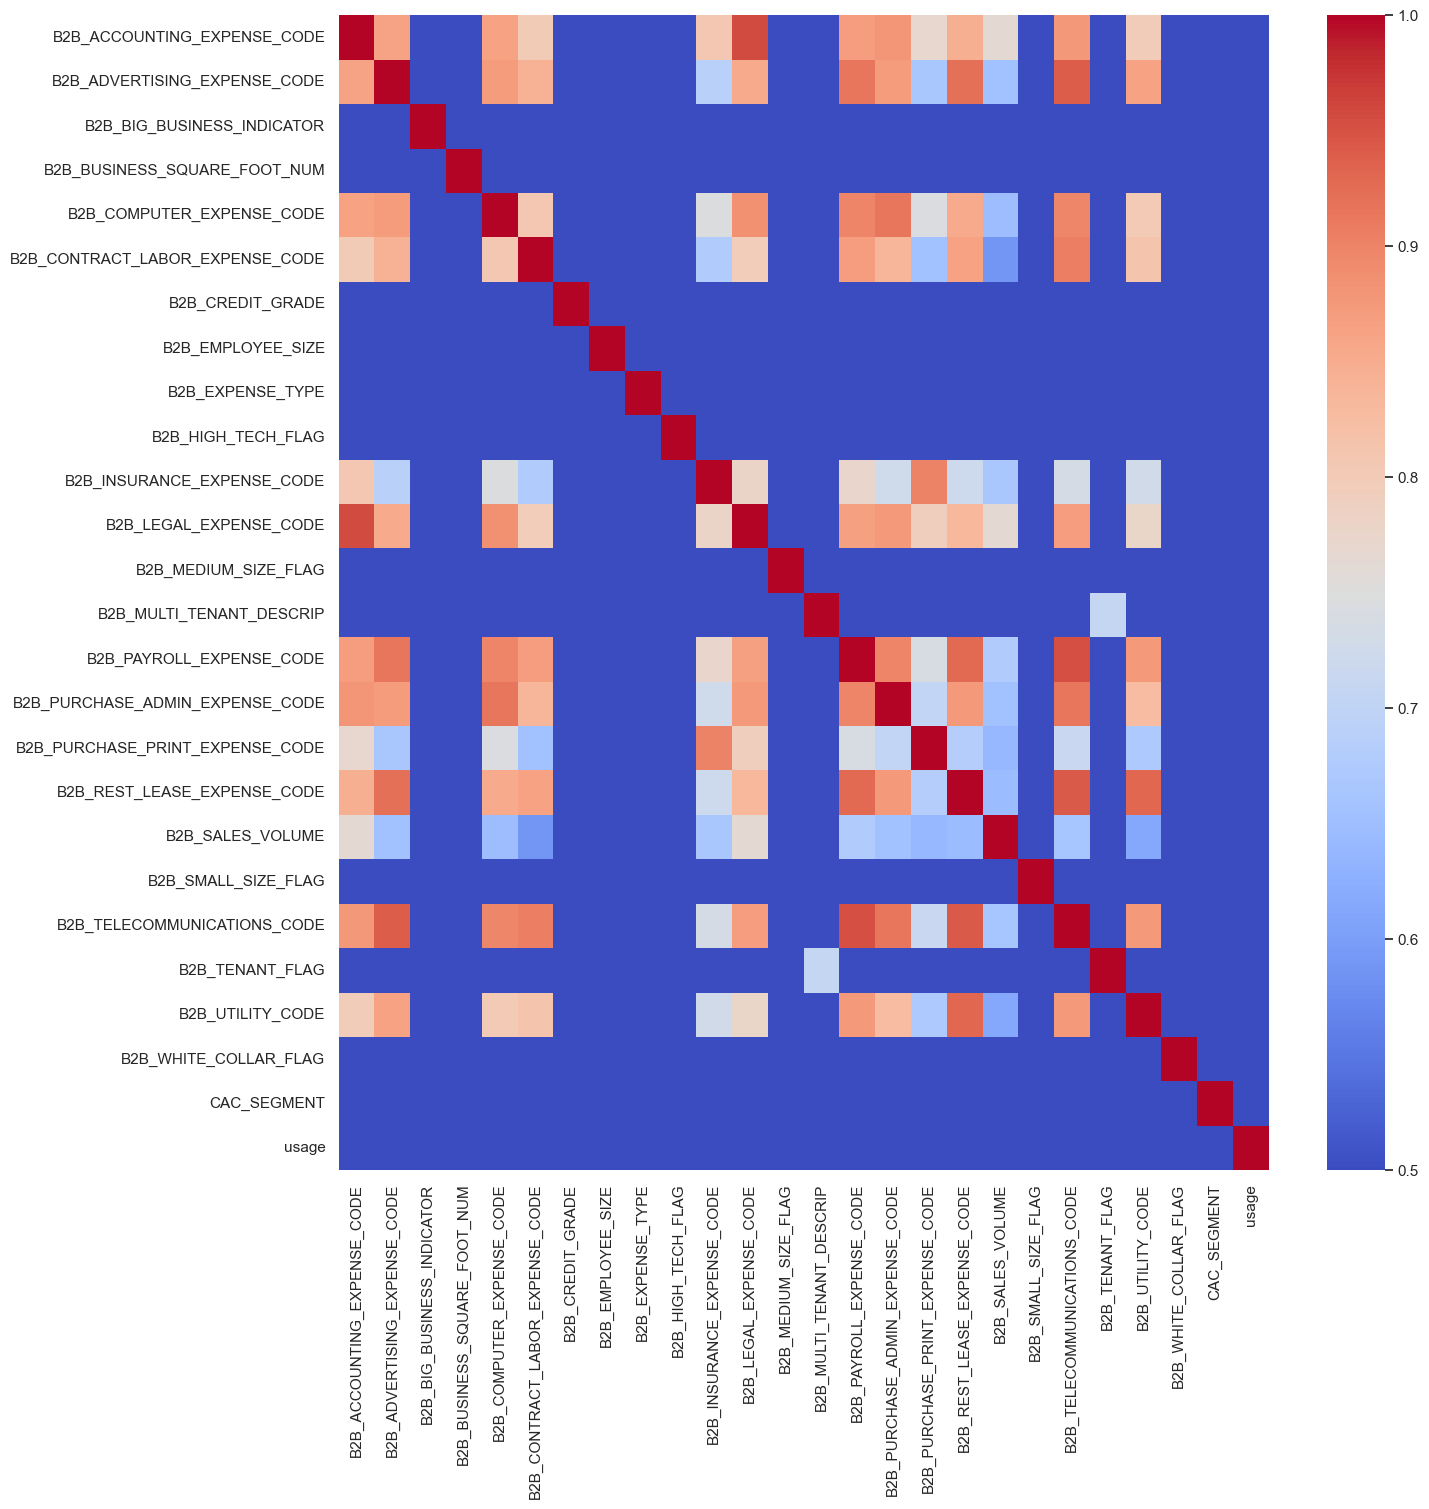

In [11]:
# Heat map showing correlation among attributes
sns.set (rc = {'figure.figsize':(15, 15)})
sns.heatmap(independents.iloc[:,1:-1].corr(),cmap='coolwarm',vmin=.5)
plt.show()

Split the data to train with **_test size_** = 30% , **_train size_** = 70% of the dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

---
## Multi-Linear Regression <a class="anchor" id="MultiLinearRegression"></a>

---
## Decision Trees <a class="anchor" id="DecisionTrees"></a>

https://towardsdatascience.com/decision-tree-ba64f977f7c3
https://www.kaggle.com/code/arpikr/decision-tree-regression-model
https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/

df_train_data = df[['unique_identifier','usage','status',
"B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"]]
df_train_data

unique_identifier	B2B_ADDR_ZIP5	B2B_ADDR_STATE	B2B_ACCEPT_CREDIT_CARD_FLAG	B2B_ACCOUNTING_EXPENSE_CODE	B2B_AD_SIZE	B2B_ADVERTISING_EXPENSE_CODE	B2B_BIG_BUSINESS_INDICATOR	B2B_BUSINESS_DESCRIP_FLAG	B2B_BUSINESS_GROW_FLAG	B2B_BUSINESS_SQUARE_FOOT_NUM	B2B_CALL_STATUS	B2B_COMPUTER_EXPENSE_CODE	B2B_CONTRACT_LABOR_EXPENSE_CODE	B2B_CREDIT_FLAG	B2B_CREDIT_GRADE	B2B_CREDIT_SCORE	B2B_CREDIT_YEAR	B2B_EMPLOYEE_DERVTN_FLAG	B2B_EMPLOYEE_NUM	B2B_EMPLOYEE_SIZE	B2B_EXPENSE_TYPE	B2B_FIRST_YEAR_CCYY	B2B_HIGH_INCOME_EXEC_FLAG	B2B_HIGH_TECH_FLAG	B2B_INDIVIDUAL_FLAG	B2B_INSURANCE_EXPENSE_CODE	B2B_LEGAL_EXPENSE_CODE	B2B_MEDIUM_SIZE_FLAG	B2B_MULTI_EXEC_FLAG	B2B_MULTI_TENANT_DESCRIP	B2B_NAICS_CODE	B2B_NAICS_CODE_DESCRIP	B2B_NAICS1	B2B_NAICS1_DESCRIP	B2B_NAICS2	B2B_NAICS2_DESCRIP	B2B_NUM_TENANATS	B2B_OFFICE_SUPPLY_EXPENSE_CODE	B2B_PACKAGE_EXPENSE_CODE	B2B_PAY_AT_PUMP_FLAG	B2B_PAYROLL_EXPENSE_CODE	B2B_POP_DENSITY	B2B_PRIMARY_SIC	B2B_PRIMARY_SIC_DESCRIP	B2B_PRIMARY_SIC_FLAG	B2B_PRIMARY_SITE_FLAG	B2B_PRODUCTION_DATE	B2B_PURCHASE_ADMIN_EXPENSE_CODE	B2B_PURCHASE_PRINT_EXPENSE_CODE	B2B_REST_LEASE_EXPENSE_CODE	B2B_SALES_VOLUME	B2B_SALES_VOLUME_ESTIM	B2B_SECONDARY_SIC_CODE1	B2B_SECONDARY_SIC_CODE2	B2B_SECONDARY_SIC_DESCRIP1	B2B_SECONDARY_SIC_DESCRIP2	B2B_SIC_CODE	B2B_SIC_DESCRIP	B2B_SMALL_SIZE_FLAG	B2B_STATE_CODE	B2B_TELECOMMUNICATIONS_CODE	B2B_TENANT_FLAG	B2B_TRUE_FRNCHSE_FLAG	B2B_UTILITY_CODE	B2B_WEALTH_FLAG	B2B_WHITE_COLLAR_FLAG	B2B_WHITE_COLLAR_PRCNT	B2B_YEAR_SIC_ADD	CAC_SEGMENT	usage	status


In [ ]:
#sns.set(rc={'figure.figsize':(35,16)}) #35,16
#sns.pairplot(independents,palette='Set1')

The main difference between a decision tree classifier and a decision tree regressor in scikit-learn is the type of output they produce.

A decision tree classifier is used when the target variable is categorical or qualitative in nature, meaning that it takes on discrete values or categories. The classifier will build a tree-like model that partitions the data into smaller and smaller subsets based on the values of the independent variables, and assigns a class label to each subset based on the majority class of the instances in that subset. The output of the classifier is a discrete class label or category for each instance in the data.

On the other hand, a decision tree regressor is used when the target variable is continuous or quantitative in nature, meaning that it takes on a range of values. The regressor will build a tree-like model that partitions the data into smaller and smaller subsets based on the values of the independent variables, and assigns a numeric value to each subset based on the mean or median value of the instances in that subset. The output of the regressor is a continuous value or range of values for each instance in the data.

In summary, the decision tree classifier and decision tree regressor differ in the type of output they produce - discrete class labels for the classifier, and continuous values for the regressor - and the type of target variable they are designed to hand

In [14]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [15]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [16]:
dtree.score(X_train,y_train)

0.8702171800569375

In [17]:
dtree.score(X_test,y_test)

-1.0266774419617275

evaluate the decision tree

In [18]:
y_pred= dtree.predict(X_test)

Mean squared error: 67247271201.51
Mean absolute error: 83955.59
R-squared: -1.03


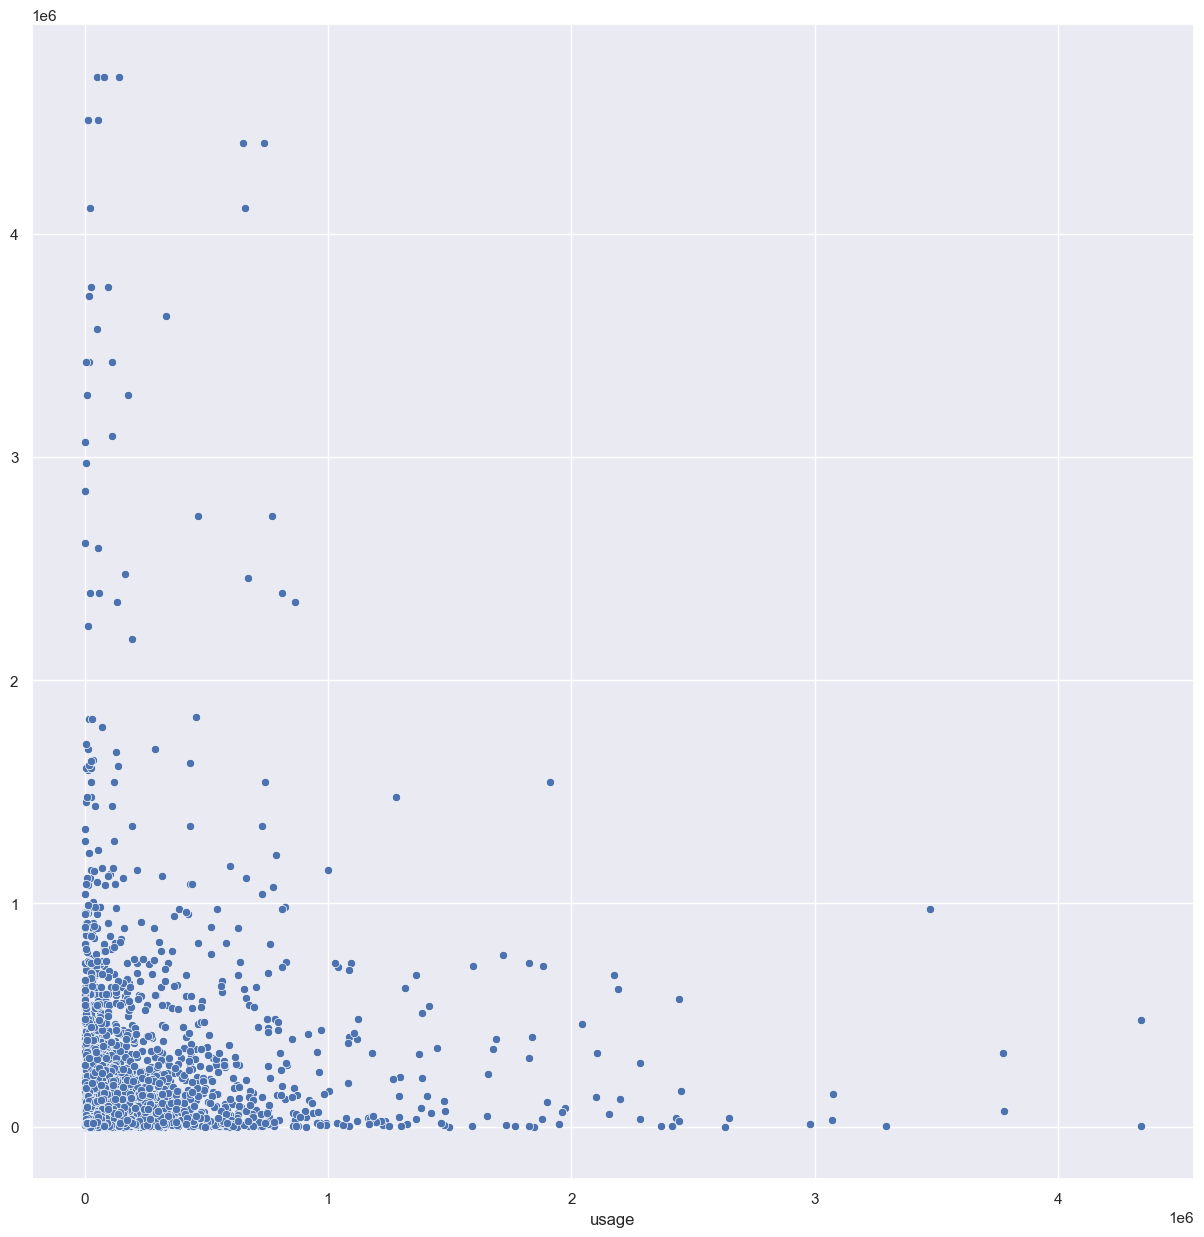

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

Visualize the evaluation of the model

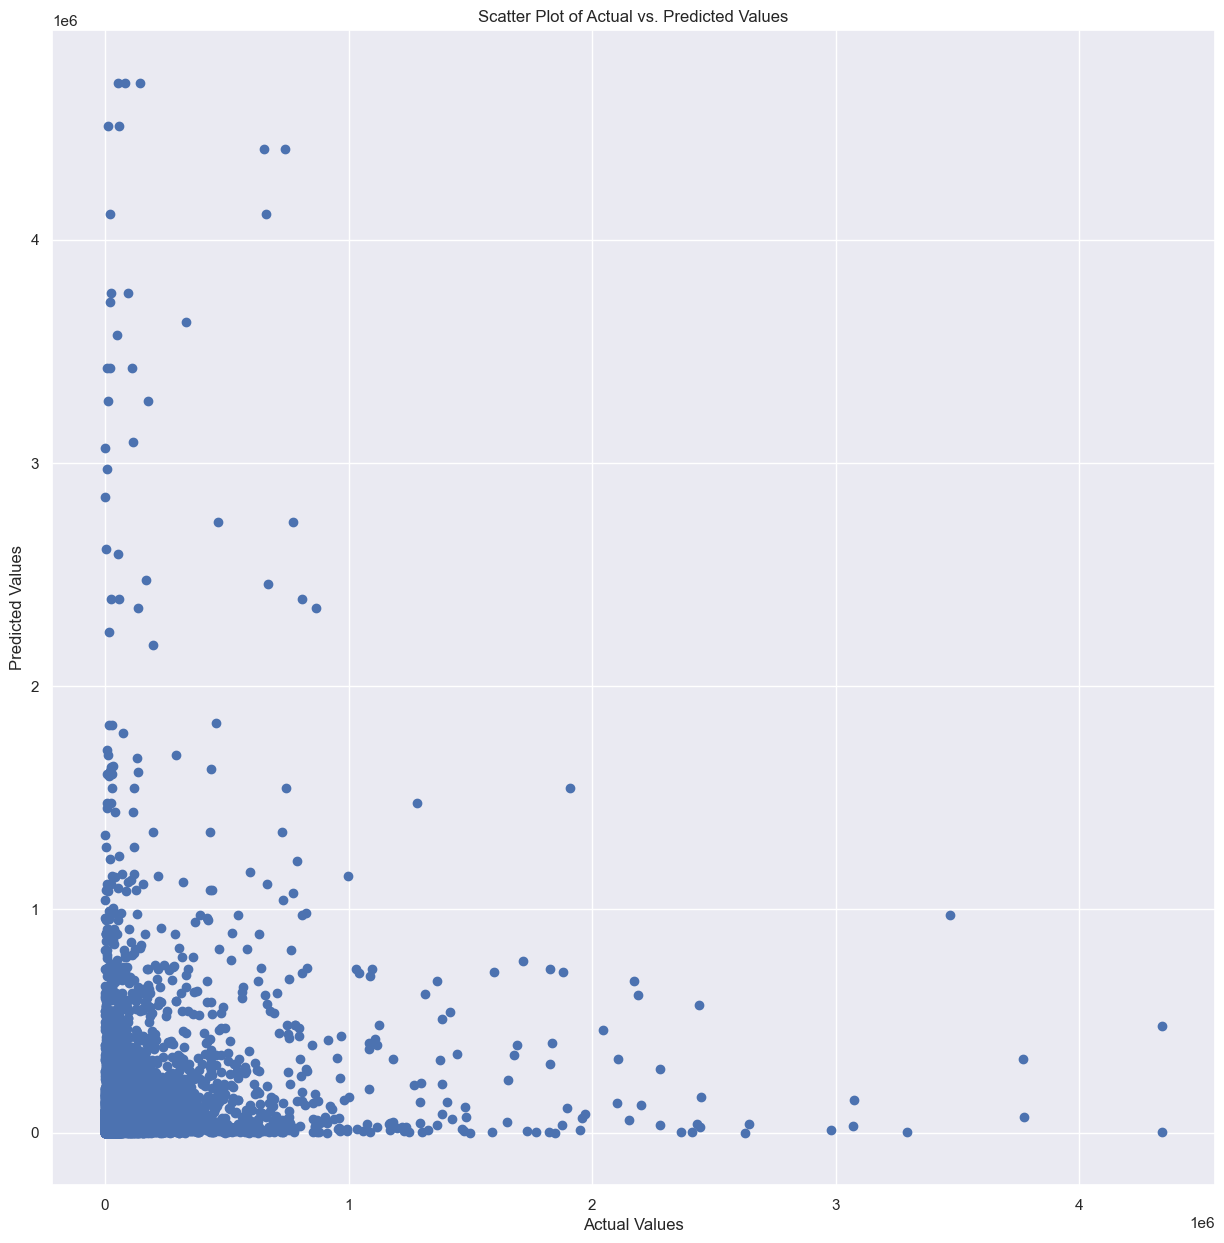

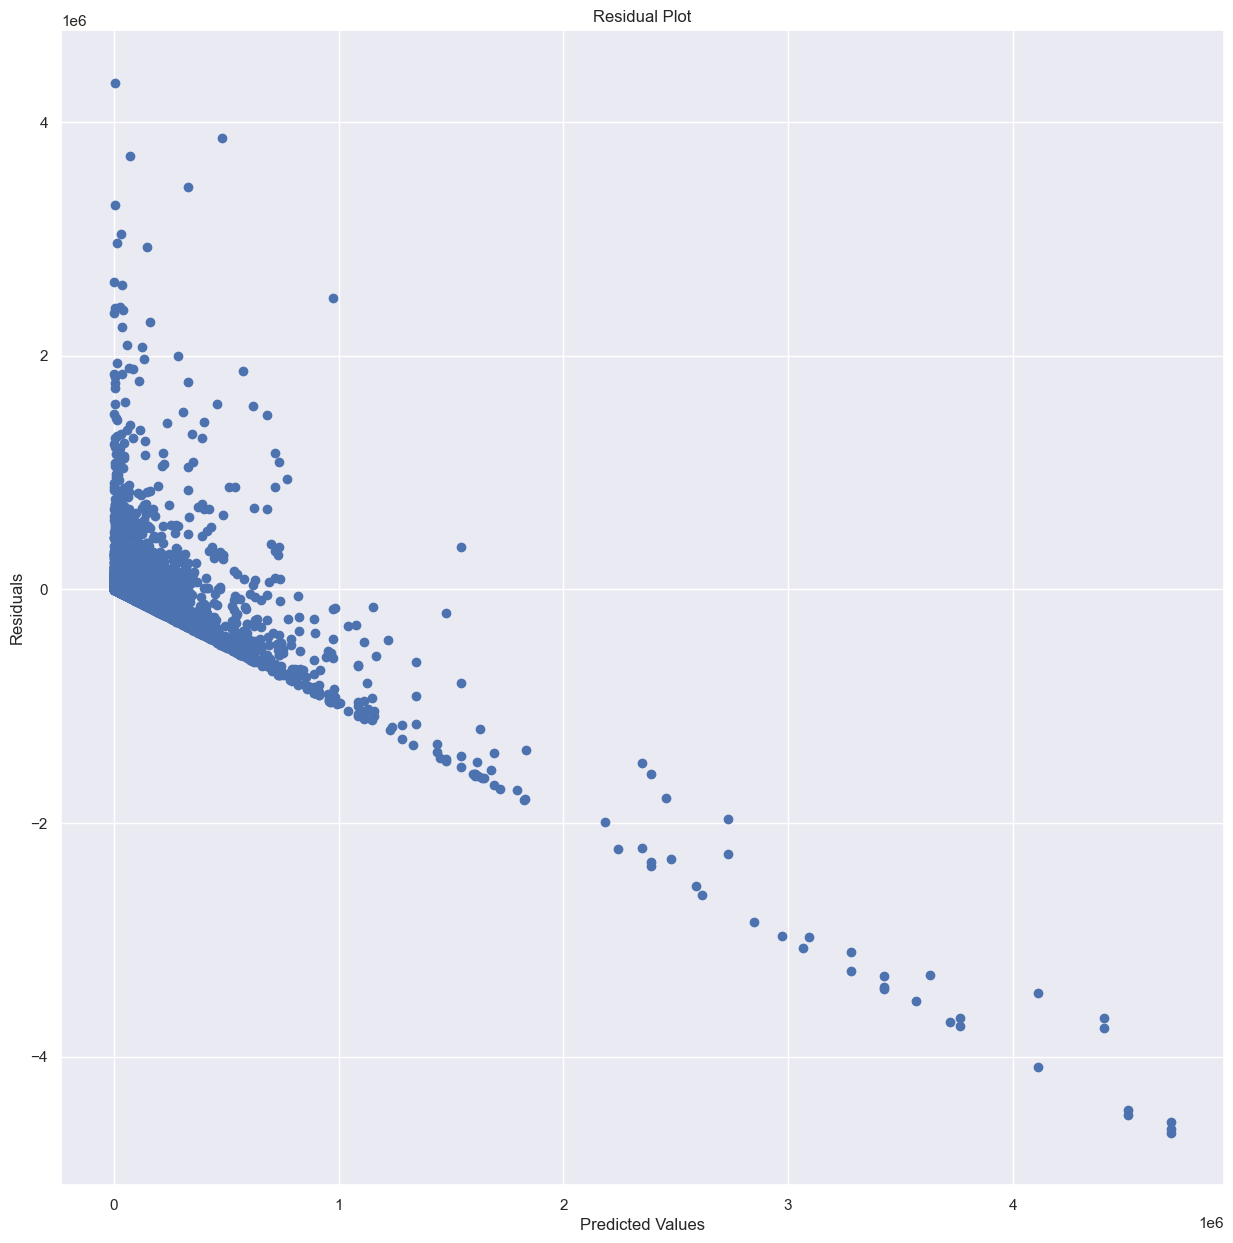

R-squared: -1.0266774419617275


In [20]:
# Create a scatter plot of the predicted values versus the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()

# Create a residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

In [21]:
dtree.feature_importances_
pd.Series(dtree.feature_importances_,index=X_train.columns).sort_values(ascending=False)

B2B_BUSINESS_SQUARE_FOOT_NUM       0.109260
B2B_CREDIT_GRADE                   0.081737
B2B_EMPLOYEE_SIZE                  0.072979
CAC_SEGMENT                        0.061364
B2B_BIG_BUSINESS_INDICATOR         0.058919
B2B_ADVERTISING_EXPENSE_CODE       0.057785
B2B_TENANT_FLAG                    0.053011
B2B_LEGAL_EXPENSE_CODE             0.048184
B2B_CONTRACT_LABOR_EXPENSE_CODE    0.046273
B2B_REST_LEASE_EXPENSE_CODE        0.044285
B2B_UTILITY_CODE                   0.042937
B2B_SALES_VOLUME                   0.039245
B2B_COMPUTER_EXPENSE_CODE          0.038730
B2B_INSURANCE_EXPENSE_CODE         0.038446
B2B_TELECOMMUNICATIONS_CODE        0.035947
B2B_PURCHASE_PRINT_EXPENSE_CODE    0.026842
B2B_PURCHASE_ADMIN_EXPENSE_CODE    0.026803
B2B_ACCOUNTING_EXPENSE_CODE        0.026368
B2B_MULTI_TENANT_DESCRIP           0.025414
B2B_PAYROLL_EXPENSE_CODE           0.018137
B2B_SMALL_SIZE_FLAG                0.015789
B2B_WHITE_COLLAR_FLAG              0.013643
B2B_MEDIUM_SIZE_FLAG            

C:\Users\PREDATOR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='usage', ylabel='Density'>

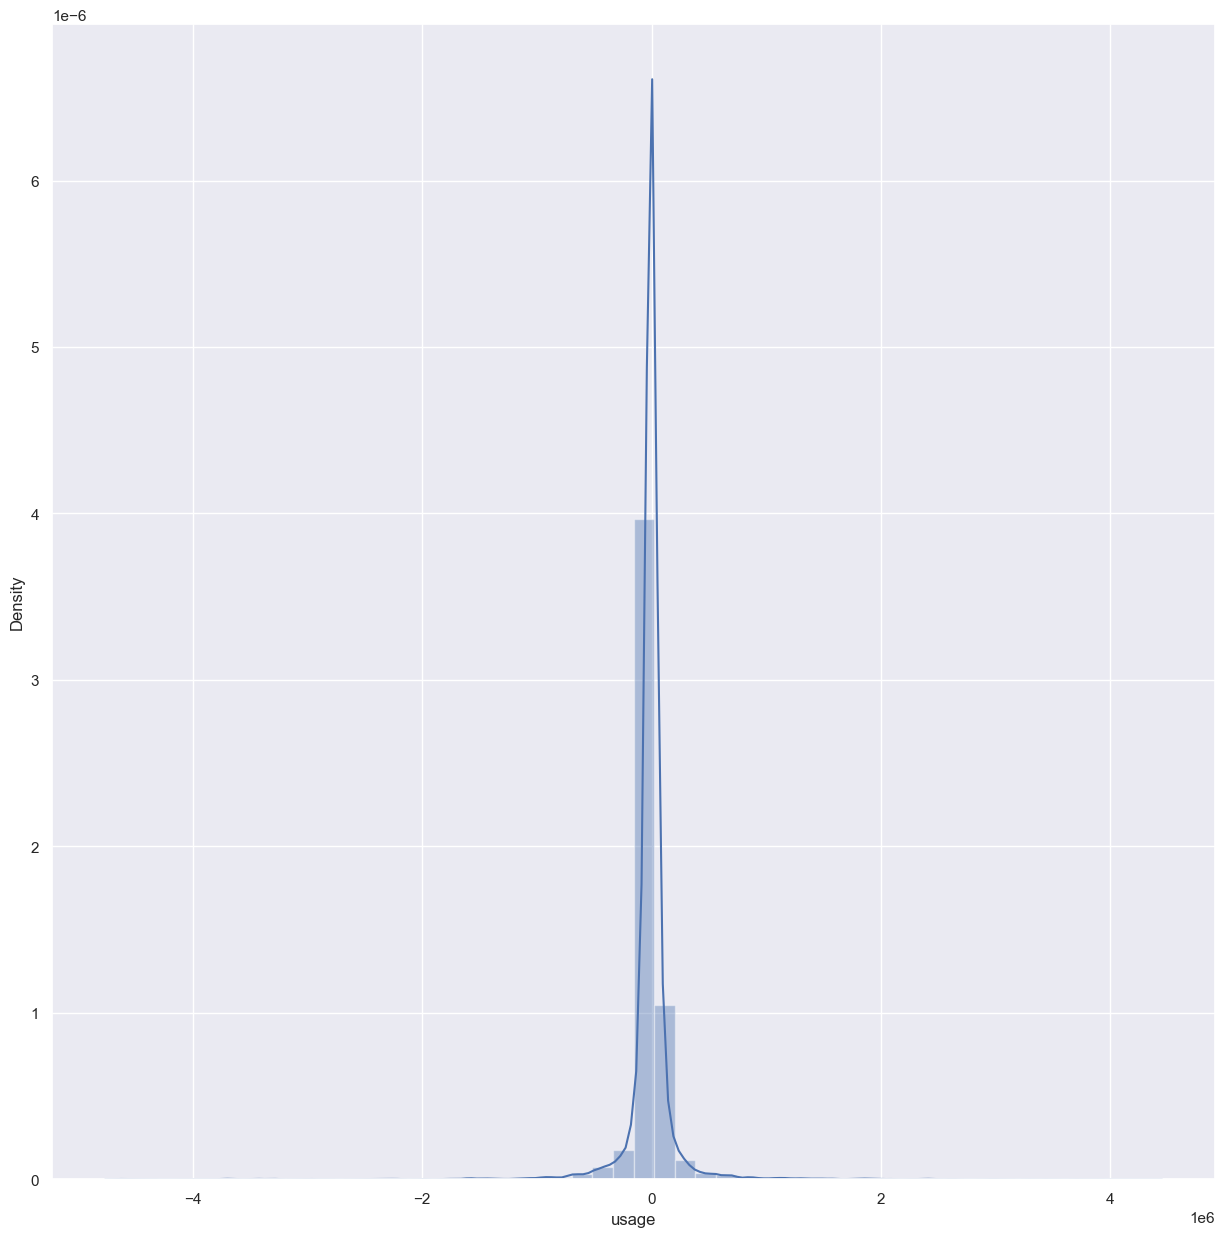

In [22]:
sns.distplot(y_test-y_pred)

In [37]:
#import sys
#!{sys.executable} -m pip install pydot
#!{sys.executable} -m pip install graphviz

from IPython.display import Image
import six
import graphviz
#from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydot

features = list(independents.columns[:])
features

['unique_identifier',
 'B2B_ADDR_STATE',
 'B2B_ACCOUNTING_EXPENSE_CODE',
 'B2B_ADVERTISING_EXPENSE_CODE',
 'B2B_BIG_BUSINESS_INDICATOR',
 'B2B_BUSINESS_SQUARE_FOOT_NUM',
 'B2B_COMPUTER_EXPENSE_CODE',
 'B2B_CONTRACT_LABOR_EXPENSE_CODE',
 'B2B_CREDIT_GRADE',
 'B2B_EMPLOYEE_SIZE',
 'B2B_EXPENSE_TYPE',
 'B2B_HIGH_TECH_FLAG',
 'B2B_INSURANCE_EXPENSE_CODE',
 'B2B_LEGAL_EXPENSE_CODE',
 'B2B_MEDIUM_SIZE_FLAG',
 'B2B_MULTI_TENANT_DESCRIP',
 'B2B_PAYROLL_EXPENSE_CODE',
 'B2B_PURCHASE_ADMIN_EXPENSE_CODE',
 'B2B_PURCHASE_PRINT_EXPENSE_CODE',
 'B2B_REST_LEASE_EXPENSE_CODE',
 'B2B_SALES_VOLUME',
 'B2B_SMALL_SIZE_FLAG',
 'B2B_TELECOMMUNICATIONS_CODE',
 'B2B_TENANT_FLAG',
 'B2B_UTILITY_CODE',
 'B2B_WHITE_COLLAR_FLAG',
 'CAC_SEGMENT',
 'usage',
 'status']

In [38]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

#import sys
#!{sys.executable} -m pip install pydotplus

import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()

export_graphviz(dtree,filled=True,rounded=True, feature_names=X_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

KeyboardInterrupt: 

### Hyperparameter tuning

In [24]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [25]:
# calculating different regression metrics
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(dtree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [26]:
%%capture  
#(don't even run it, took me hours!!)
from datetime import datetime

start_time=timer(None)

#tuning_model.fit(X,y)

timer(start_time)

In [27]:
# best hyperparameters 
tuning_model.best_params_

#{'max_depth': 5,
# 'max_features': 'auto',
# 'max_leaf_nodes': None,
# 'min_samples_leaf': 1,
# 'min_weight_fraction_leaf': 0.1,
# 'splitter': 'best'}

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [28]:
# best model score
tuning_model.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [29]:
dtree_tuned= DecisionTreeRegressor(max_depth=12,max_features='auto',max_leaf_nodes=20,min_samples_leaf=5,min_weight_fraction_leaf=0.1,splitter='random')

In [30]:
# fitting model
dtree_tuned.fit(X_train,y_train)

C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=12, max_features='auto', max_leaf_nodes=20,
                      min_samples_leaf=5, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [31]:
# prediction 
y_tuned_pred=dtree_tuned.predict(X_test)

Mean squared error: 30986985462.63
Mean absolute error: 68223.17
R-squared: 0.07


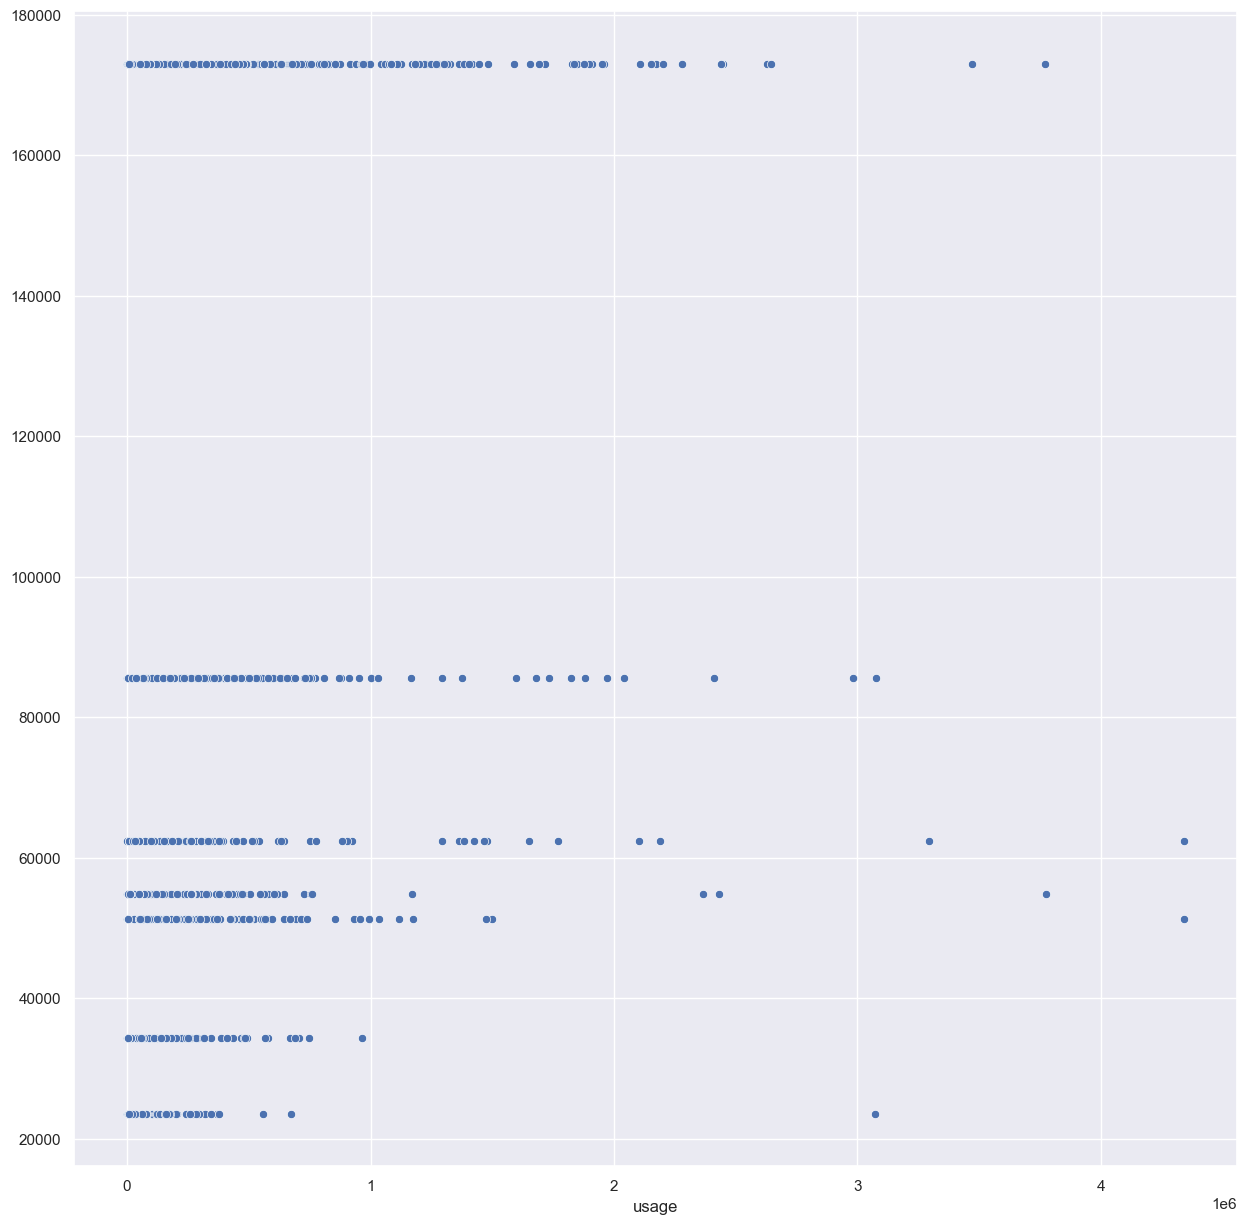

In [32]:
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_tuned_pred)
mae = mean_absolute_error(y_test, y_tuned_pred)
r2 = r2_score(y_test, y_tuned_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_tuned_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

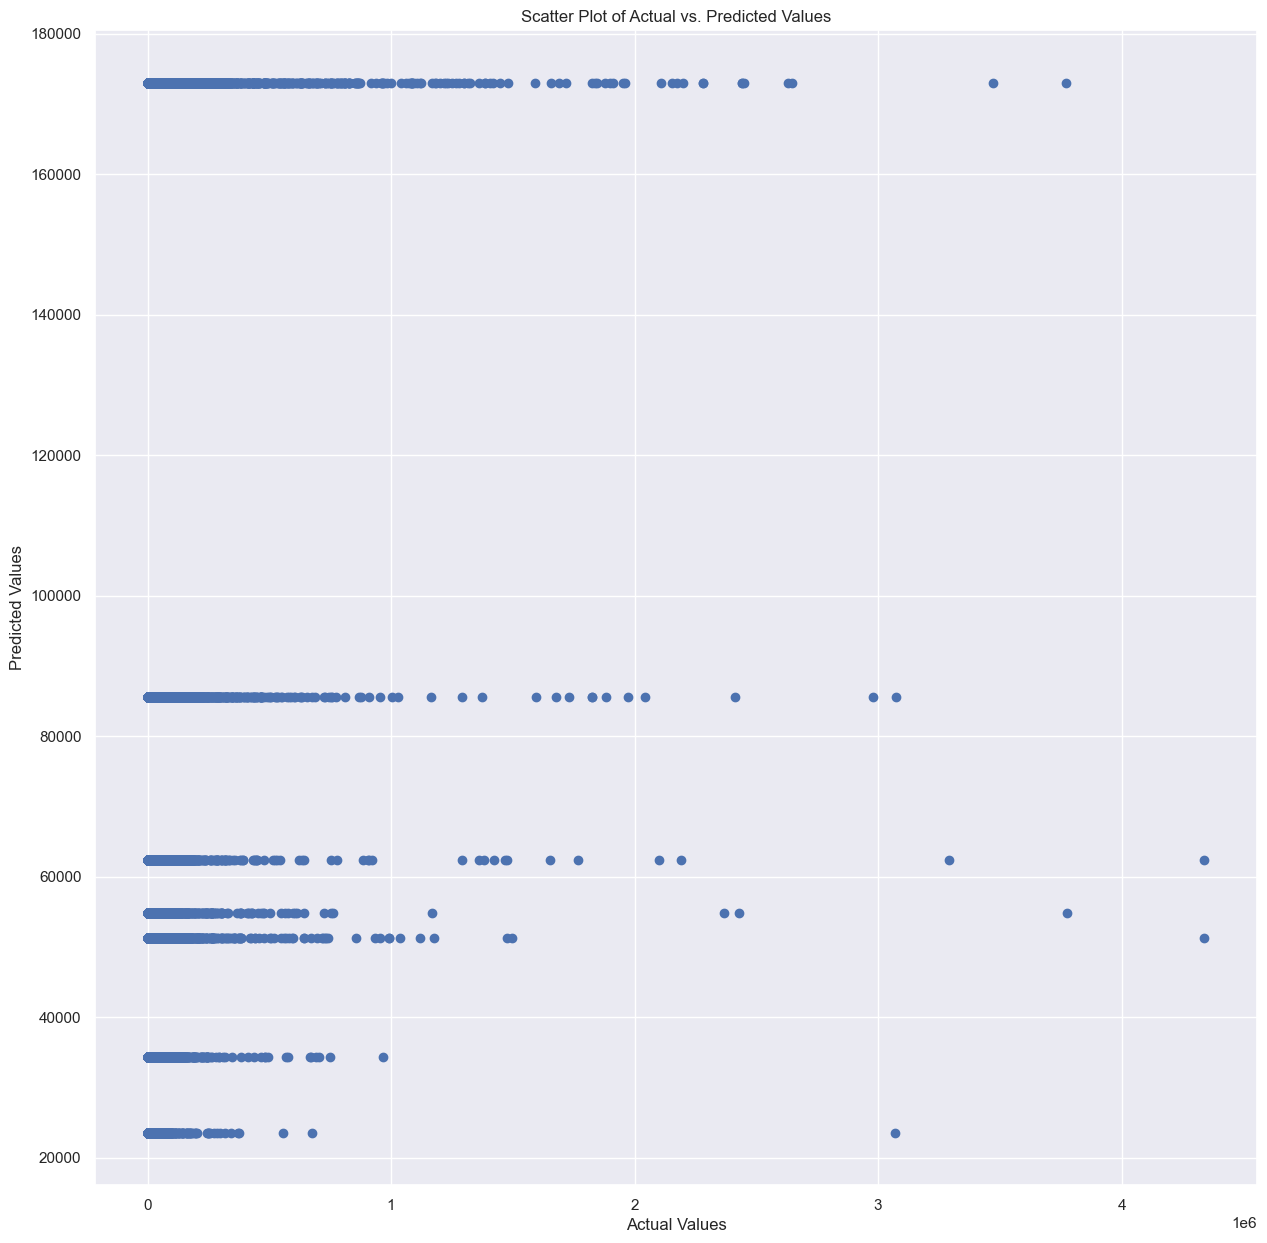

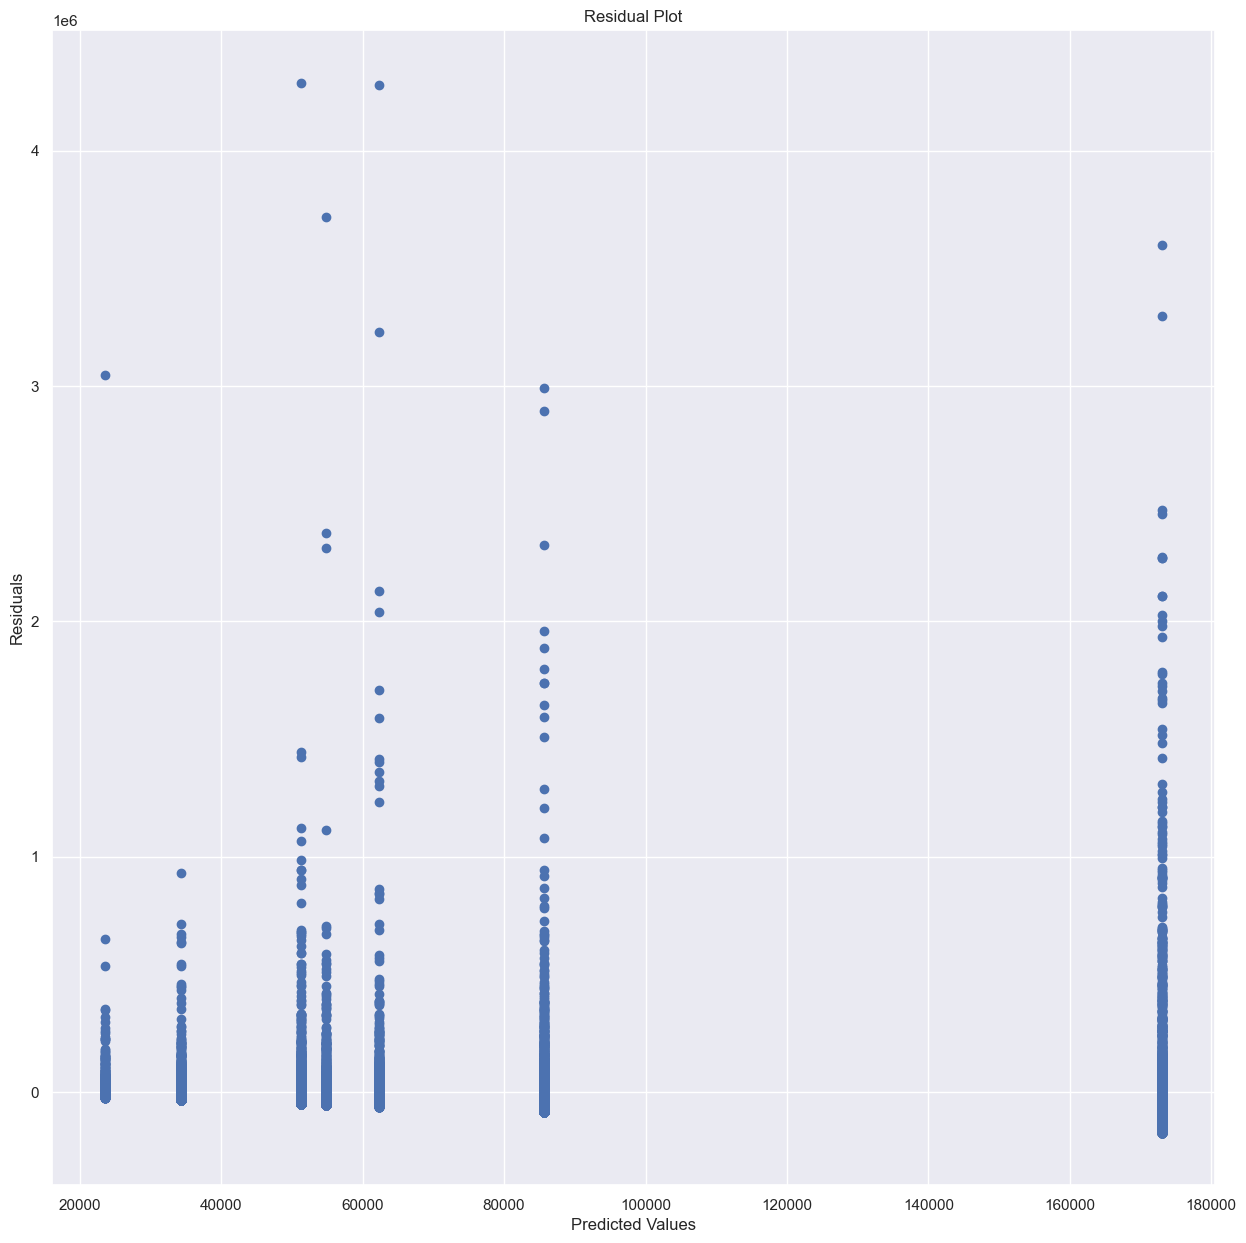

R-squared: 0.0661238246631436


In [33]:
# Create a scatter plot of the predicted values versus the actual values
plt.scatter(y_test, y_tuned_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()

# Create a residual plot
residuals = y_test - y_tuned_pred
plt.scatter(y_tuned_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate the R-squared value
r_squared = r2_score(y_test, y_tuned_pred)
print('R-squared:', r_squared)

C:\Users\PREDATOR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='usage', ylabel='Density'>

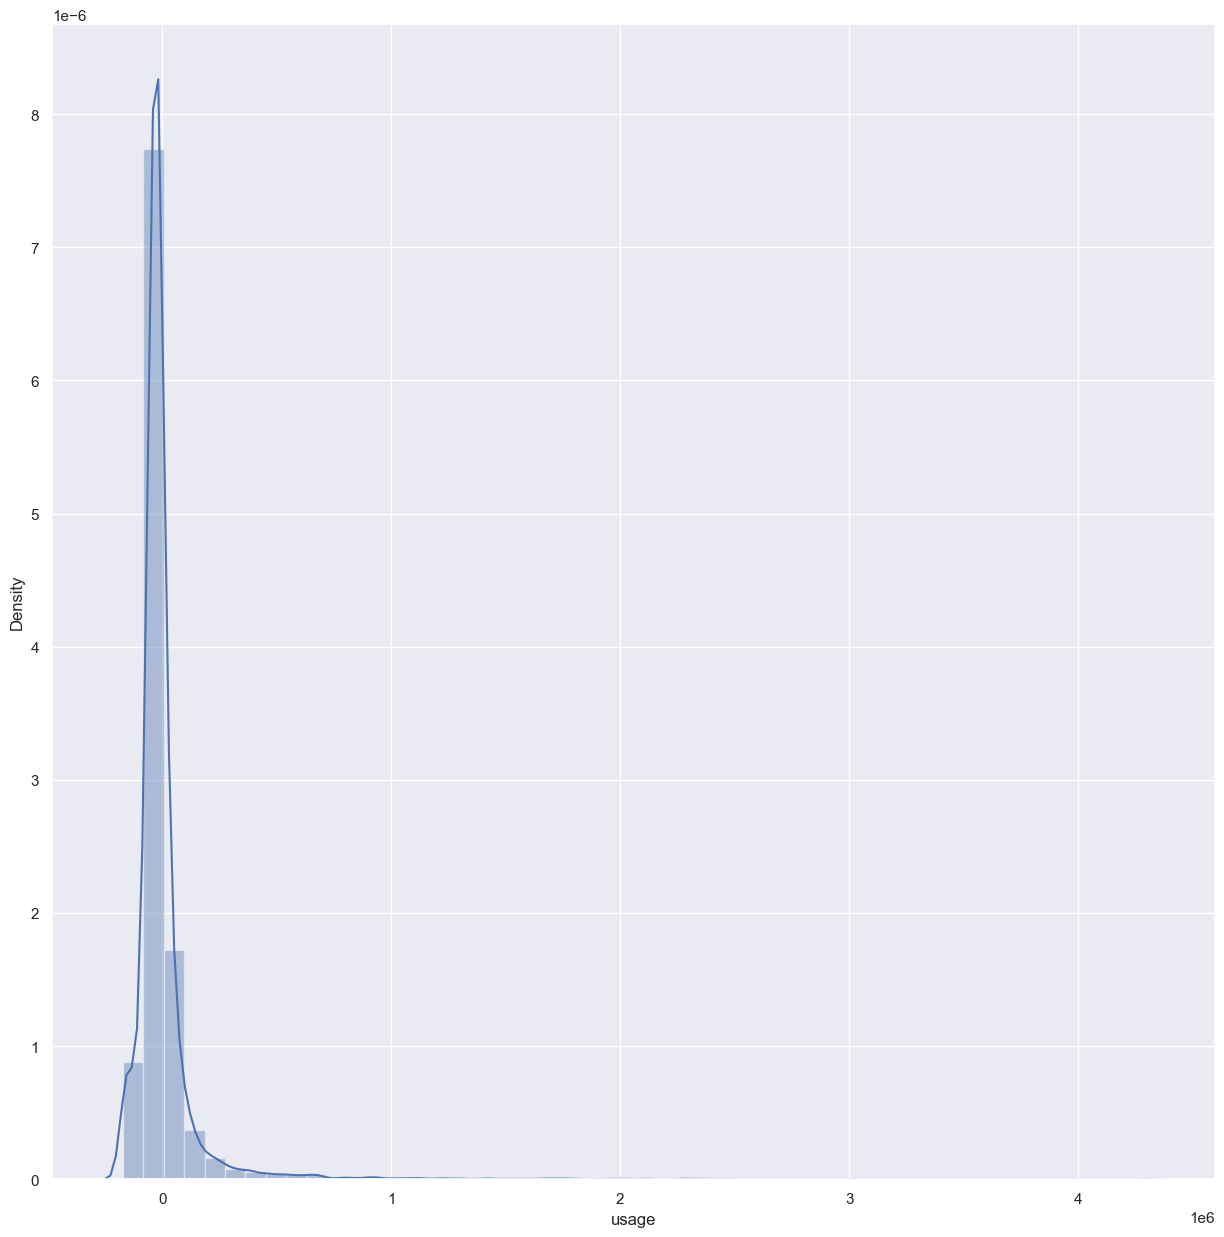

In [34]:
sns.distplot(y_test-y_tuned_pred)

In [35]:
dtree_tuned.feature_importances_
feat_importances= pd.Series(dtree_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feat_importances

B2B_EMPLOYEE_SIZE                  0.817939
B2B_UTILITY_CODE                   0.114861
B2B_WHITE_COLLAR_FLAG              0.036254
B2B_SMALL_SIZE_FLAG                0.025258
CAC_SEGMENT                        0.004038
B2B_ACCOUNTING_EXPENSE_CODE        0.001651
B2B_CREDIT_GRADE                   0.000000
B2B_PURCHASE_PRINT_EXPENSE_CODE    0.000000
B2B_BIG_BUSINESS_INDICATOR         0.000000
B2B_BUSINESS_SQUARE_FOOT_NUM       0.000000
B2B_TENANT_FLAG                    0.000000
B2B_TELECOMMUNICATIONS_CODE        0.000000
B2B_COMPUTER_EXPENSE_CODE          0.000000
B2B_SALES_VOLUME                   0.000000
B2B_REST_LEASE_EXPENSE_CODE        0.000000
B2B_PURCHASE_ADMIN_EXPENSE_CODE    0.000000
B2B_CONTRACT_LABOR_EXPENSE_CODE    0.000000
B2B_PAYROLL_EXPENSE_CODE           0.000000
B2B_MULTI_TENANT_DESCRIP           0.000000
B2B_ADVERTISING_EXPENSE_CODE       0.000000
B2B_LEGAL_EXPENSE_CODE             0.000000
B2B_INSURANCE_EXPENSE_CODE         0.000000
B2B_HIGH_TECH_FLAG              

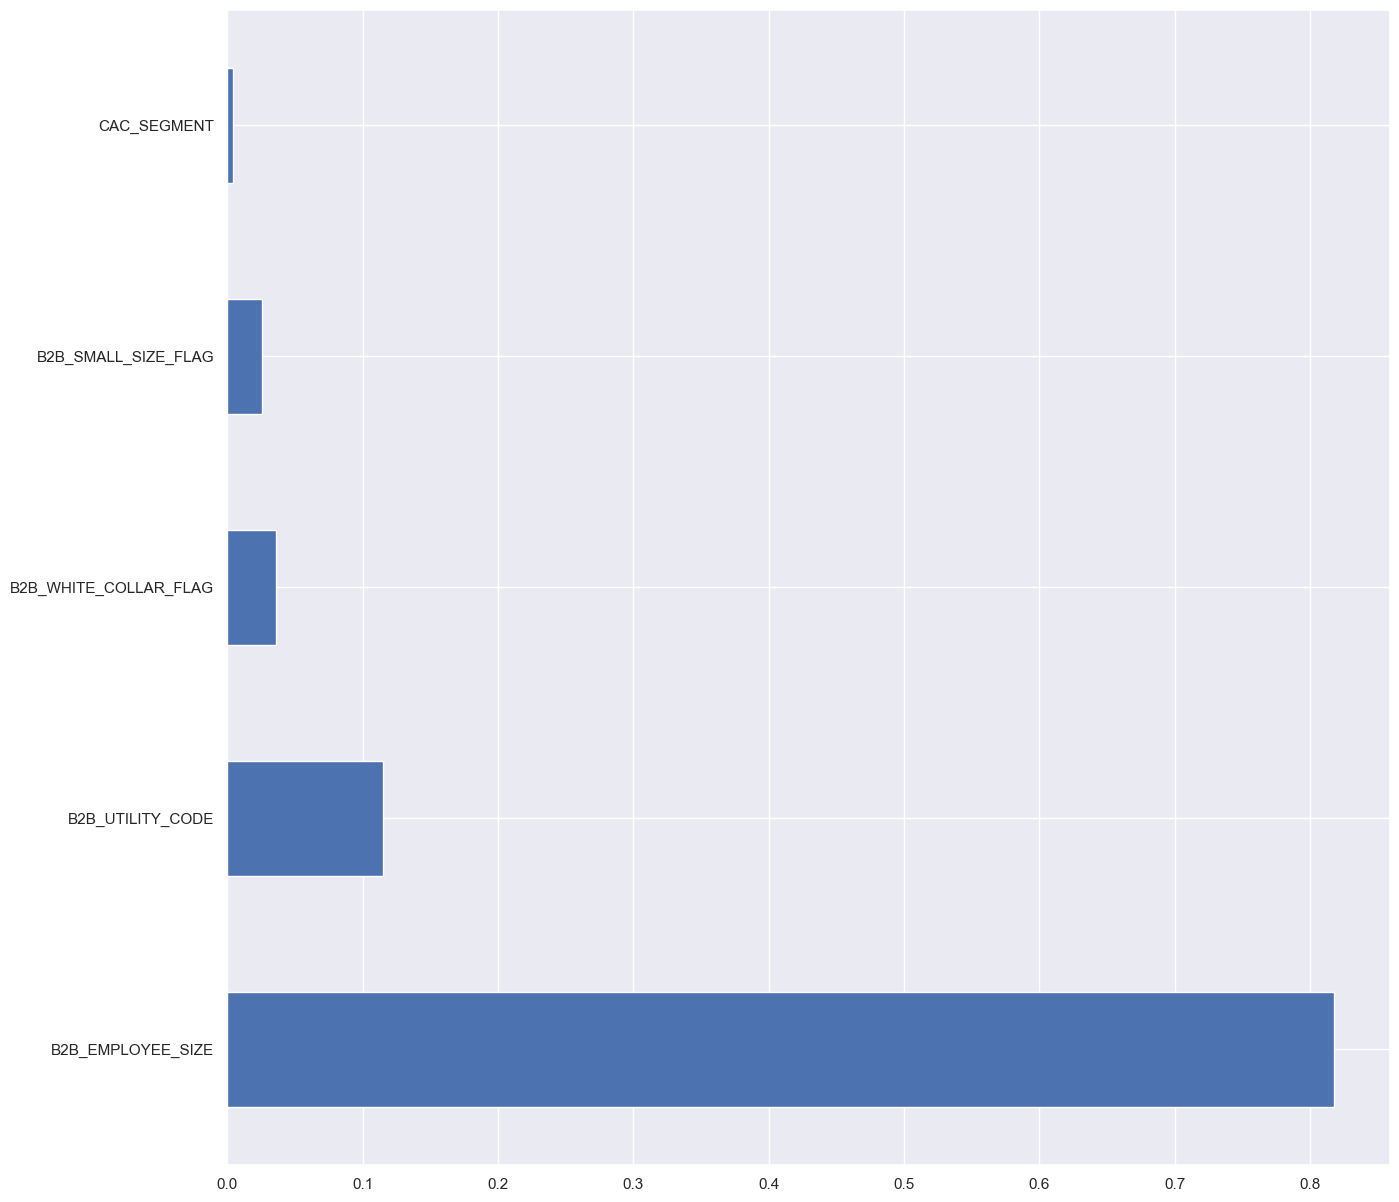

In [36]:
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

A confusion matrix is typically used after training a classification model, including decision trees, to evaluate the performance of the model on a validation or test set. The confusion matrix allows you to see the number of true positives, false positives, true negatives, and false negatives generated by the model, which can help you understand how well the model is performing and identify any areas for improvement.

By contrast, decision trees are a type of supervised learning algorithm that can be used for both classification and regression tasks. Decision trees are used to create a model that predicts the value of a target variable based on several input variables or features. The decision tree algorithm works by recursively splitting the data based on the most informative features, with the goal of creating subsets of the data that are more homogeneous with respect to the target variable.

In [ ]:
#from sklearn.metrics import classification_report,confusion_matrix
#display(confusion_matrix(y_test,predictions))

plot the confusion matrix

In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

#cm = confusion_matrix(y_test,predictions)
#cmd = ConfusionMatrixDisplay(cm, display_labels= df_train_data['usage'])
#cmd.plot()

In [ ]:
#display(classification_report(y_test,predictions))

visualize the tree

In [ ]:
#import sys
#!{sys.executable} -m pip install pydot
#!{sys.executable} -m pip install graphviz

from IPython.display import Image
import six
import graphviz
#from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydot

features = list(independents.columns[:])
features

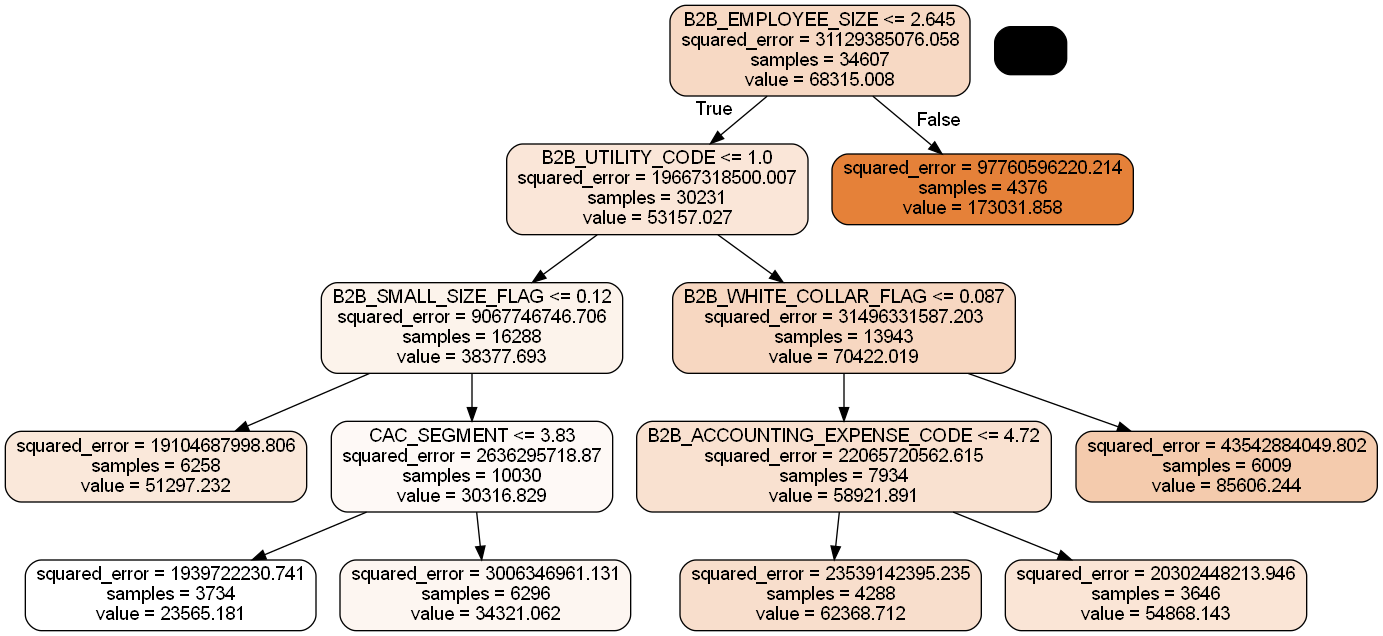

In [39]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()

export_graphviz(dtree_tuned,filled=True,rounded=True, feature_names=X_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [ ]:
# Square foot num _ Employee size , ulti code, employ num

---
## Random Forests <a class="anchor" id="RandomForests"></a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,max_depth=12,max_features='auto',max_leaf_nodes=20,min_samples_leaf=5,min_weight_fraction_leaf=0.1,criterion="squared_error")
#{'max_depth': 5,
# 'max_features': 'auto',
# 'max_leaf_nodes': None,
# 'min_samples_leaf': 1,
# 'min_weight_fraction_leaf': 0.1,
# 'splitter': 'best'}
rfr.fit(X_train, y_train)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
rfr.score(X_train,y_train)

In [ ]:
rfr.score(X_test,y_test)

In [ ]:
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

In [ ]:
parameters={"criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
tuning_model=GridSearchCV(rfr,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
%%capture

start_time=timer(None)

#tuning_model.fit(X,y)

timer(start_time)

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
rfr_tuned = RandomForestRegressor(n_estimators=100,)
rfr_tuned.fit(X_train,y_train)
# prediction 
y_tuned_pred=rfr_tuned.predict(X_test)

In [ ]:
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_tuned_pred)
mae = mean_absolute_error(y_test, y_tuned_pred)
r2 = r2_score(y_test, y_tuned_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_tuned_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

In [ ]:
rfr.feature_importances_
feat_importances= pd.Series(rfr.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feat_importances

In [ ]:
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

#import sys
#!{sys.executable} -m pip install pydotplus

import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()

export_graphviz(rfr.estimators_[0],filled=True,rounded=True, feature_names=X_train.columns ,out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## Naive Bayers <a class="anchor" id="NaiveBayers"></a>

In [ ]:
y_new_status = df["status"]
y_new_status

In [ ]:
y_new_status.unique()

In [ ]:
print(X.shape, y_new_status.shape)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_labels = le.fit_transform(y_new_status)
#print(numerical_labels)
print(le.inverse_transform(y_labels))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.30)

In [ ]:
y_train

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))

In [ ]:
# Predict
print(le.inverse_transform(gnb.predict(X_test[1:2])))

---
## K-Nearest Neighbor (K-NN) <a class="anchor" id="KNN"></a>

In [ ]:
# Setting independent variables
df["B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_STATUS_CODE",
"B2B_OFFICE_SIZE",
"B2B_TOT_EMPLOYEE_SIZE",
"B2B_PUBLIC_INDICATOR",
"B2B_IMPORT_EXPORT_FLAG",
"B2B_GOVERNMENT_FLAG",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_OWN_LEASE_FLAG",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_RESTAURANT_SRVCE_TYPE",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"]
